# Regresion lineal gradientes(Vino Rojo)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Cargamos los datos

In [51]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


## A razon de lo aprendido cuando interactuamos con la libreria seaborn, se aprovecho realizar un HeatMap

<AxesSubplot:>

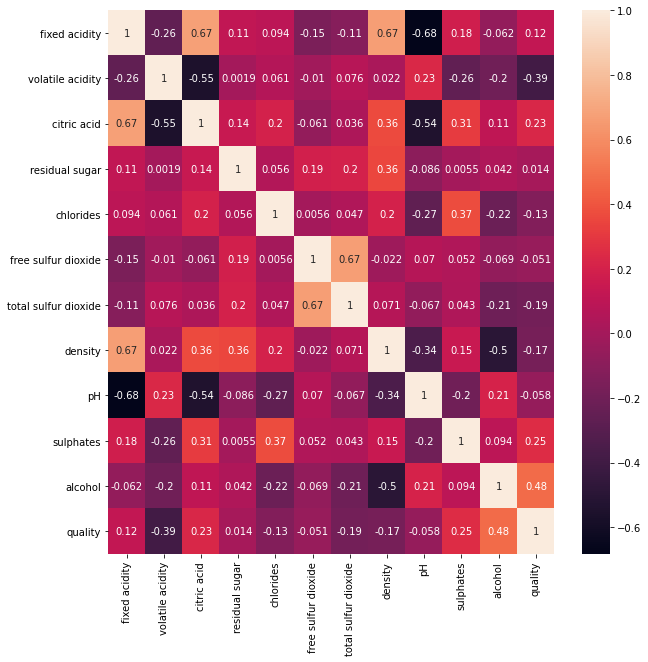

In [52]:
fig, ax = plt.subplots(figsize=(10,10))   
sb.heatmap(data.corr(), annot=True, ax= ax)

# Reconstruccion de los datos

In [53]:
x = data.loc[:, data.columns != 'quality'].to_numpy()
y = data.loc[:, data.columns == 'quality'].to_numpy().tolist()
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [54]:
y = np.array(y)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

# Normalizacion de datos

In [55]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

# Division de los datos

In [56]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(len(data)):
    if i <= int(len(data) * 0.8) : 
        x_train.append(x[i])
        y_train.append(y[i])
    elif  i > int(len(data) * 0.8) :
        y_test.append(y[i])
        x_test.append(x[i])


x_train = np.array(x_train)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_test = np.array(x_test)


In [57]:
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate((ones,x_train),axis=1)

x_train.shape[0]

1280

In [58]:
x_test.shape[0]

319

In [59]:
y_test.shape[0]

319

In [60]:
x_train

array([[1.        , 0.24778761, 0.39726027, ..., 0.60629921, 0.13772455,
        0.15384615],
       [1.        , 0.28318584, 0.52054795, ..., 0.36220472, 0.20958084,
        0.21538462],
       [1.        , 0.28318584, 0.43835616, ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [1.        , 0.21238938, 0.39041096, ..., 0.48031496, 0.16167665,
        0.2       ],
       [1.        , 0.30088496, 0.40753425, ..., 0.39370079, 0.1257485 ,
        0.16923077],
       [1.        , 0.46017699, 0.12328767, ..., 0.31496063, 0.14371257,
        0.47692308]])

In [61]:
y_train = y_train.reshape(y_train.shape[0],)

y_train[:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

Siguiendo los metodos tradicionales en las pruebas de datos por aprendizaje automático, nos aseguramos de crear datos para entrenar, y datos para probar, con eso podemos probar nuestra hipótesis con datos desconocidos, y con ello nuestros resultados no se veran comprometidos.

# Funciones establecidas

## Debido a que necesitamos alguna manera de probar nuestros datos, se creo, una funcion donde se realiza la prediccion por cada valor de y. Ademas se creo otra funcion que obtiene el RMSE, para observar la eficiencia de nuestra hipotesis de entrada

In [62]:
def prediction_raw(theta, x_test):
    test = np.zeros(x_test.shape[0])
    for num_index in range(len(x_test)):
        test[num_index] = theta[0] + theta[1]*x_test[num_index][0] + theta[2]*x_test[num_index][1]+theta[3]*x_test[num_index][2]+theta[4]*x_test[num_index][3]+theta[5]*x_test[num_index][4]+theta[6]*x_test[num_index][5]+theta[7]*x_test[num_index][6]+theta[8]*x_test[num_index][7]+theta[9]*x_test[num_index][8]+theta[10]*x_test[num_index][9]+theta[11]*x_test[num_index][10]

    return test

In [63]:
 def Root_Mean_Squared_Error(y_test, predictions):
    mean_squared_error = 0
    n = len(y_test)
    for i in range(len(y_test)):
        mean_squared_error =  (np.square((y_test[i] - predictions[i])) + mean_squared_error)
    root_squared_error = np.sqrt(mean_squared_error/n)
    return root_squared_error

# Ecuacion normal

In [64]:
theta_normal = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)) , np.dot(x_train.T , y_train))

theta_normal

array([ 5.76076874,  0.26484261, -1.53995727, -0.18256602,  0.15488863,
       -1.05297899,  0.23399689, -1.04450141, -0.27316687, -0.43612409,
        1.34473479,  1.84160484])

In [65]:
prediction_normal = prediction_raw(theta_normal, x_test)
meta = Root_Mean_Squared_Error(y_test, prediction_normal)
Root_Mean_Squared_Error(y_test, prediction_normal)

array([0.65720643])

In [66]:
prediction_normal.reshape( len(prediction_normal) ,1)[:10]

array([[5.72141267],
       [5.72141267],
       [5.67498939],
       [5.38662836],
       [5.89857618],
       [5.84818251],
       [6.60437183],
       [6.37785895],
       [5.68664388],
       [5.68664388]])

In [67]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

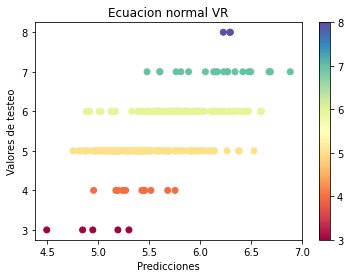

In [68]:
plt.scatter(prediction_normal, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Ecuacion normal VR')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Batch Gradient descent

In [69]:
number_of_features = x_train.shape[1]

theta_batch = np.random.randn(number_of_features)/100
print(theta_batch)

eta = 0.1
max_iter = 2001
m = x_train.shape[0]


j_batch = []
i = 0

last_costo = 0
delta_j = 0
valor = int(max_iter/4)
corte = valor
costo = 0


for i in range(max_iter):
    theta_batch = theta_batch - eta*(1/m * (x_train.T.dot((np.dot(x_train, theta_batch))  - y_train)))
    costo = (1/(2*m))* np.square((np.dot(x_train, theta_batch)  - y_train)).sum()
    j_batch.append(costo)
   
    prediction_batch_des = prediction_raw(theta_batch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_batch_des)

    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
print(theta_batch)



[-0.00388553 -0.00398628  0.00314232  0.00234339 -0.00620192 -0.01928127
  0.00185745 -0.01047809  0.02070787  0.00078665  0.02218357  0.01272854]
El valor 500 es un punto de corte
El valor [0.70200539] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 5.533226791668011e-05

El valor 1000 es un punto de corte
El valor [0.686484] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 2.0710280648705837e-05

El valor 1500 es un punto de corte
El valor [0.67623114] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 1.1206212310821417e-05

El valor 2000 es un punto de corte
El valor [0.66968492] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 6.386256716506278e-06

Numero de iteraciones 2000
La meta se cumplio en [0.66968492] se buscaba [0.65720643]
La diferencia entre J(i) es 6.386256716506278e-06
Los valores de theta fueron: 
[ 4.79390941  0.72552328

In [70]:
prediction_batch_des = prediction_raw(theta_batch, x_test)
prediction_batch_des.reshape(len(prediction_batch_des), 1)[:10]

array([[5.65301526],
       [5.65301526],
       [5.64351788],
       [5.41748735],
       [5.82152427],
       [5.87081789],
       [6.51572815],
       [6.25169476],
       [5.62392311],
       [5.62392311]])

In [71]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

In [72]:
Root_Mean_Squared_Error(y_test, prediction_batch_des)

array([0.66968492])

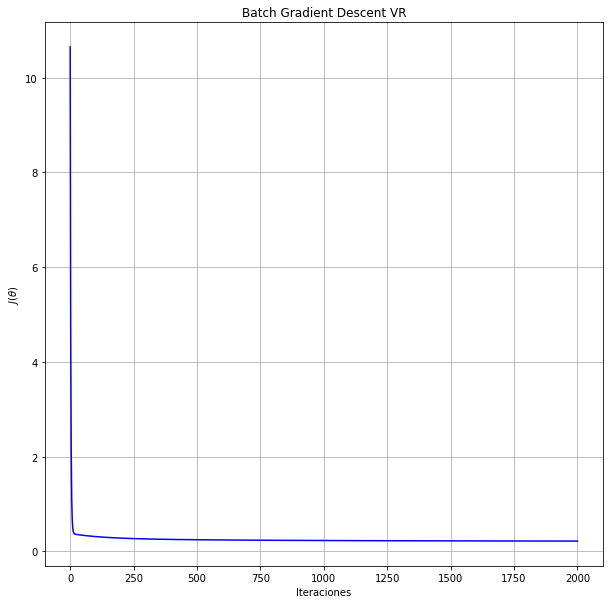

In [73]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_batch)),j_batch,"b-")
plt.title('Batch Gradient Descent VR')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()


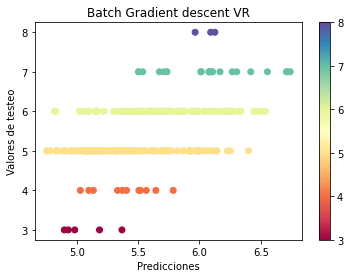

In [74]:
plt.scatter(prediction_batch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Batch Gradient descent VR')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Stochastic Gradient Descent

In [75]:


number_of_features = x_train.shape[1]

theta_stoch =  np.random.randn(number_of_features)/100

print(theta_stoch)

eta = 0.1
j_stoch = []
i = 0

valor = int(max_iter/4)
corte = valor
costo = 0

for i in range(max_iter):
    costo = 0
    for j in range(m):
        random_indices = np.random.randint(0 ,m -1)
        x_stoch = x_train[random_indices]
        y_stoch = y_train[random_indices]

        theta_stoch = theta_stoch - eta*(1/m * x_stoch.T.dot(((np.dot(x_stoch, theta_stoch))  - y_stoch)))
    
        costo += (1/(2*m))* np.sum(np.square((np.dot(x_stoch, theta_stoch)  - y_stoch)))
    j_stoch.append(costo)

    prediction_stoch_des = prediction_raw(theta_stoch, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_stoch_des)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
theta_stoch

[ 0.00089829 -0.00234898 -0.01073656 -0.00918406  0.00596646  0.00648692
  0.0090137   0.00398301  0.00986532  0.00682335  0.00245845  0.01471822]
El valor 500 es un punto de corte
El valor [0.7012621] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.005645727311750309

El valor 1000 es un punto de corte
El valor [0.68614627] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.0012208693591627129

El valor 1500 es un punto de corte
El valor [0.67541209] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.0006874491845946518

El valor 2000 es un punto de corte
El valor [0.66913037] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.00498789008149092

Numero de iteraciones 2000
La meta se cumplio en [0.66913037] se buscaba [0.65720643]
La diferencia entre J(i) es 0.00498789008149092
Los valores de theta fueron: 


array([ 4.78246939,  0.73061186, -1.09937732,  0.10662888, -0.03025585,
       -0.34649359,  0.1469451 , -0.68668284, -0.20115505,  0.57776546,
        1.17900072,  2.00467735])

In [76]:
prediction_stoch_des.reshape(len(prediction_stoch_des), 1)[:10]

array([[5.64977034],
       [5.64977034],
       [5.64010562],
       [5.41744604],
       [5.81721121],
       [5.86983735],
       [6.509656  ],
       [6.24622522],
       [5.62429162],
       [5.62429162]])

In [77]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

In [78]:
Root_Mean_Squared_Error(y_test, prediction_stoch_des)

array([0.66913037])

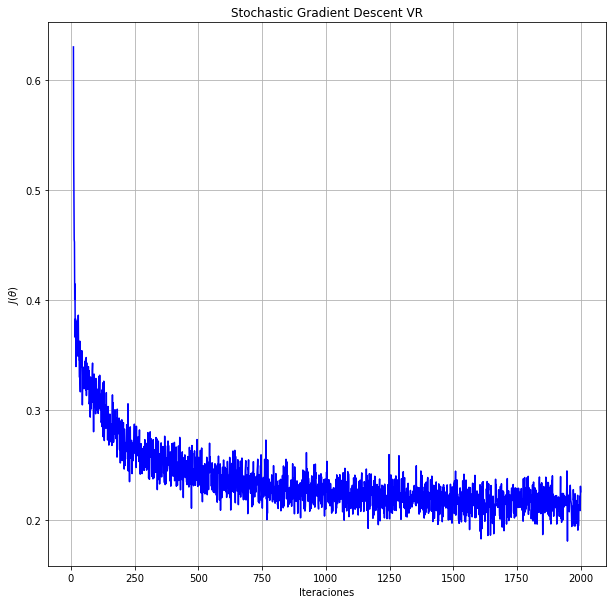

In [79]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_stoch))[10:],j_stoch[10:],"b-")
plt.title('Stochastic Gradient Descent VR')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

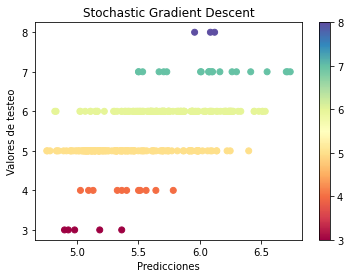

In [80]:
plt.scatter(prediction_stoch_des, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Stochastic Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Mini-Batch Gradient Descent

In [81]:
number_of_features = x_train.shape[1]

theta_mini =np.random.randn(number_of_features)/100

print(theta_mini)

eta = 0.1
batch_size = 64

j_mini = []
i = 0

valor = int(max_iter/4)
corte = valor
costo = 0

for i in range(max_iter):
    random_indices = np.random.permutation(m)
    x_batch_size = x_train[random_indices]
    y_batch_size = y_train[random_indices]

    costo = 0.0
   
    for j in range(0 , m , batch_size):
        x_mini = x_batch_size[j:j + batch_size]
        y_mini = y_batch_size[j:j + batch_size]
        theta_mini =  theta_mini  - (eta/m) * (x_mini.T.dot(((np.dot(theta_mini, x_mini.T)) - y_mini)))
        costo = (1/(2*m))* np.sum(np.square((np.dot(x_mini, theta_mini)  - y_mini)))
    j_mini.append(costo)  
    
    prediction_mini = prediction_raw(theta_mini, x_test)
    
    paro = Root_Mean_Squared_Error(y_test, prediction_mini)
    
    if i == corte:
        print("El valor {} es un punto de corte".format(corte))
        print("El valor {} representa al RMSE actual se quiere llegar a {}".format(paro, meta))
        print("La diferencia entre J(i) es {}".format(abs(last_costo - costo)))
        corte = corte + valor
        delta_j = abs(last_costo - costo)
        print()
    last_costo = costo

print("Numero de iteraciones {}".format(i))
print("La meta se cumplio en {} se buscaba {}".format(paro, meta))
print("La diferencia entre J(i) es {}".format(delta_j))
print("Los valores de theta fueron: ")
theta_mini

[-0.01625274 -0.00188245  0.00352649 -0.00183796  0.0001663   0.01075515
  0.0053534   0.02061328 -0.00476286 -0.00238424  0.00113815  0.00333241]
El valor 500 es un punto de corte
El valor [0.7022934] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.001248318814490345

El valor 1000 es un punto de corte
El valor [0.68675117] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.0028547496132533684

El valor 1500 es un punto de corte
El valor [0.67641204] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.005867687188129552

El valor 2000 es un punto de corte
El valor [0.66979679] representa al RMSE actual se quiere llegar a [0.65720643]
La diferencia entre J(i) es 0.0017843023942399963

Numero de iteraciones 2000
La meta se cumplio en [0.66979679] se buscaba [0.65720643]
La diferencia entre J(i) es 0.0017843023942399963
Los valores de theta fueron: 


array([ 4.79185   ,  0.73787043, -1.10752612,  0.10240533, -0.03595124,
       -0.33787608,  0.14037988, -0.68832787, -0.21723306,  0.58336278,
        1.17866276,  2.00423543])

In [82]:
prediction_mini.reshape(len(prediction_mini), 1)[:10]

array([[5.65183375],
       [5.65183375],
       [5.64291504],
       [5.41761851],
       [5.82132476],
       [5.87182409],
       [6.51570228],
       [6.25305315],
       [5.61977651],
       [5.61977651]])

In [83]:
y_test[:10]

array([[6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [5]])

In [84]:
Root_Mean_Squared_Error(y_test, prediction_mini)

array([0.66979679])

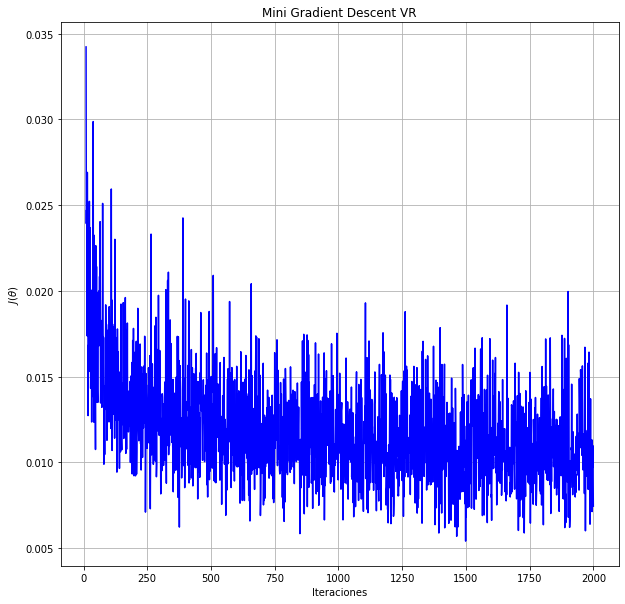

In [85]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini))[10:],j_mini[10:],"b-")
plt.title('Mini Gradient Descent VR')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()

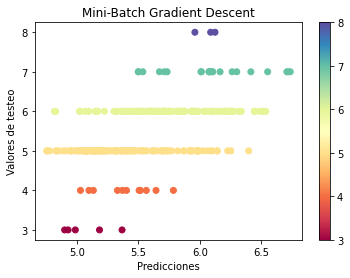

In [86]:
plt.scatter(prediction_mini, y_test, c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Predicciones')
plt.ylabel('Valores de testeo')
plt.show()

# Comparacion

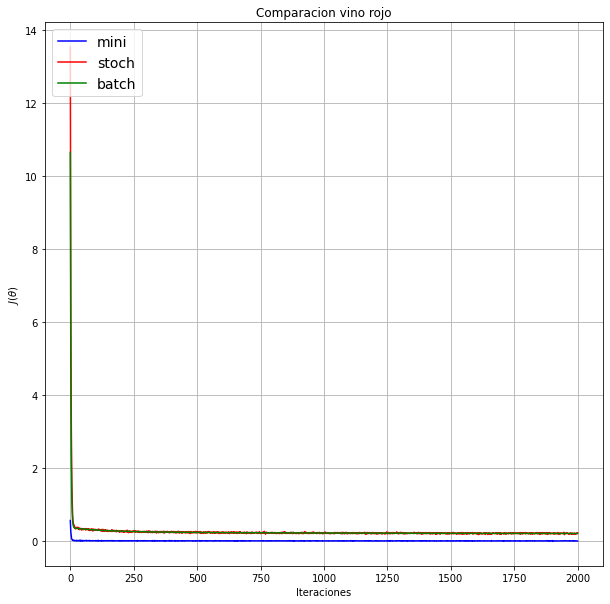

In [87]:
plt.figure(figsize=(10,10))   
plt.plot(np.arange(len(j_mini)),j_mini,"b-", label="mini")
plt.plot(np.arange(len(j_stoch)),j_stoch,"r-", label="stoch")
plt.plot(np.arange(len(j_batch)),j_batch,"g-", label="batch")
plt.legend(loc="upper left", fontsize=14)
plt.title('Comparacion vino rojo')
plt.xlabel('Iteraciones')
plt.ylabel(r"$J(\theta)$")
plt.grid(True)
plt.show()